In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 6s 1us/step


In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
class_names = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'sandal', 'shirt', 'sneaker', 'Bag', 'Ankle Boot']

In [8]:
train_images.shape

(60000, 28, 28)

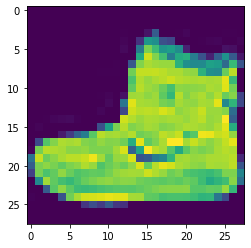

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.show()

In [10]:
train_images = train_images/255.0
test_images = test_images/255.0

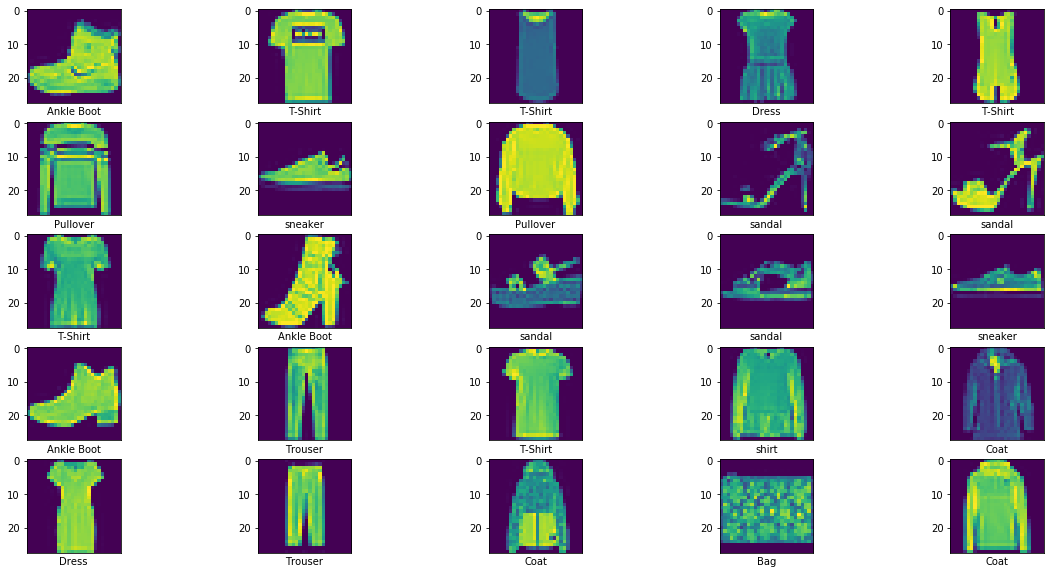

In [14]:
plt.figure(figsize=(20,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.imshow(train_images[i])
    plt.grid(False)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.6182 - accuracy: 0.7835
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3805 - accuracy: 0.8639
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3372 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3220 - accuracy: 0.8817
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2956 - accuracy: 0.8928
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2770 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2740 - accuracy: 0.8969
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2608 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2448 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.24

In [21]:
test_loss,test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3395 - accuracy: 0.8783


In [23]:
predictions = model.predict(test_images)

In [24]:
predictions[0]

array([4.6420530e-07, 1.3651001e-12, 2.3605898e-08, 2.4254760e-09,
       1.7224783e-08, 1.3678877e-04, 1.0119760e-06, 1.3499809e-03,
       4.6066884e-09, 9.9851173e-01], dtype=float32)

In [26]:
np.argmax(predictions[0])

9

In [28]:
test_labels[0]

9

In [55]:
def plot_images(i, predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[i])
    
    prediction_label = np.argmax(predictions_array[i])
    
    if prediction_label == true_label[i]:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[prediction_label], 100*np.max(predictions_array[i]), class_names[true_label[i]], color=color))

In [62]:
def plot_value_array(i, predictions_array, true_label):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array[i], color='purple')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array[i])
    thisplot[predicted_label].set_color('red')
    thisplot[true_label[i]].set_color('green')

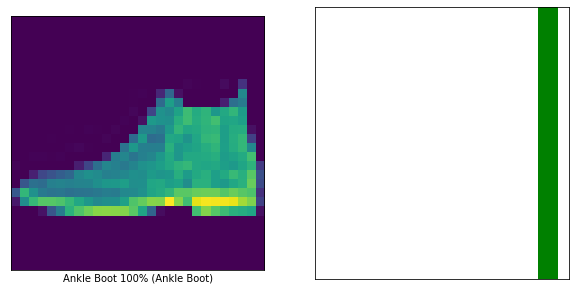

In [63]:
plt.figure(figsize =(10,5))
plt.subplot(1,2,1)
plot_images(0, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(0, predictions, test_labels)
plt.show()

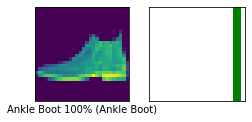

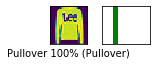

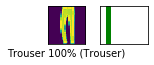

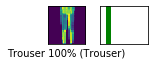

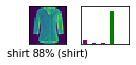

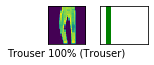

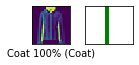

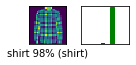

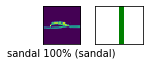

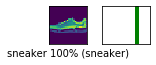

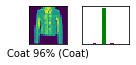

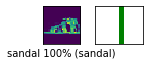

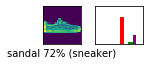

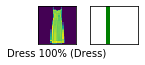

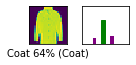

In [69]:
row =5
col =3
total_images = row*col
plt.figure(figsize=(2*2*col,2*row))
for i in range(total_images):
    plt.subplot(row,2*col,2*i+1)
    plot_images(i, predictions, test_labels, test_images)
    plt.subplot(row,2*col,2*i+2)
    plot_value_array(i, predictions, test_labels)
    plt.show()